In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # Para reproducibilidad

print("Preparado para implementar regresion lineal manual (Capitulo 2.6)")


Preparado para implementar regresion lineal manual (Capitulo 2.6)


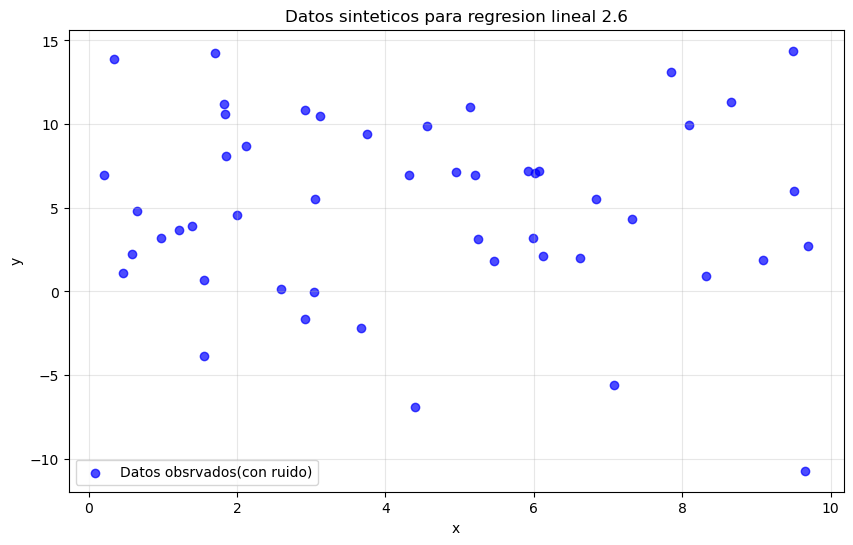

In [9]:
# Parametros verdaderos (ocultos para el modelo)
beta0_verdadero = 5.0  # intercepto
beta1_verdadero = 3.0  # pendiente

# Numero de puntos de entrenamiento
N = 50

# Generar x en [0, 10]
x = np.random.uniform(0, 10, N)

# Generar y en β0 + β1*x + ruido
sigma_ruido = 2.0
epsilon = np.random.normal(0, sigma_ruido, N)
y = beta0_verdadero + beta1_verdadero * + epsilon

# Visualizar los datos generados
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Datos obsrvados(con ruido)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos sinteticos para regresion lineal 2.6')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


In [10]:
# Matriz de diseño x: columnas de unos + columna de x
X = np.column_stack((np.ones(N), x))   # forma N, 2

print("Matriz x (primeras 5 filas):")
print(x[:5])



Matriz x (primeras 5 filas):
[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864 ]


In [11]:
# Solucion usando minimos cuadrados (estable nuimericamente)
betas_hat = np.linalg.lstsq(X, y, rcond=None)[0]

beta0_est = betas_hat[0]
beta1_est = betas_hat[1]

print(f"Intercepto estimado β₀: {beta0_est:.3f} (verdadero: {beta0_verdadero})")
print(f"Pendiente estimada β₁: {beta1_est:.3f} (verdadera: {beta1_verdadero})")


Intercepto estimado β₀: 5.580 (verdadero: 5.0)
Pendiente estimada β₁: -0.134 (verdadera: 3.0)


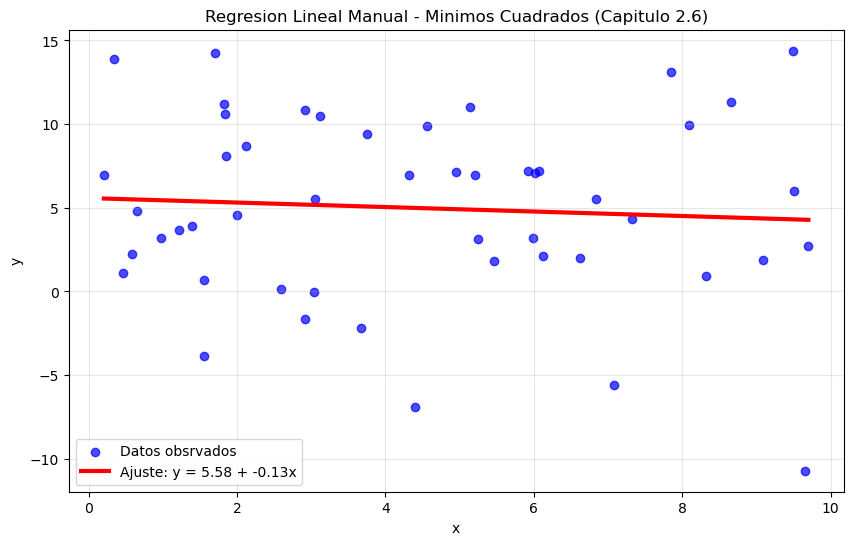

In [12]:
# Prediciones en los mismos x 
y_pred = X @ betas_hat

# Ordenar para graficar la linea suave
idx_sort = np.argsort(x)
x_sorted = x[idx_sort]
y_pred_sorted = y_pred[idx_sort]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Datos obsrvados')
plt.plot(x_sorted, y_pred_sorted, color='red', linewidth=3, label=f'Ajuste: y = {beta0_est:.2f} + {beta1_est:.2f}x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresion Lineal Manual - Minimos Cuadrados (Capitulo 2.6)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


In [14]:
# Error cuadratico medio (MSE) en entrenamiento
mse_train = np.mean((y - y_pred)**2)
print(f"MSE de entrenamiento : {mse_train:.3f}")
print(f"Raiz MSE ≈ {np.sqrt(mse_train):.3f} (similar al ruido σ = {sigma_ruido})")


MSE de entrenamiento : 29.631
Raiz MSE ≈ 5.443 (similar al ruido σ = 2.0)
